# 서울시 구별 CCTV/인구 분석

In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.family'] = 'Malgun Gothic'

In [7]:
df = pd.read_csv('서울시_CCTV_인구_병합데이터.csv')
df.set_index('구별', inplace=True)
df.head()

,CCTV댓수,최근증가율,인구수,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,
종로구,1772,8.61,155106,9077,27605,5.85,17.80
중구,2333,68.37,132259,9243,23980,6.99,18.13
용산구,2383,22.14,240665,14287,38884,5.94,16.16
성동구,3602,26.02,295767,6605,45591,2.23,15.41
광진구,2588,89.76,355306,12825,50815,3.61,14.30


- 상관관계 분석

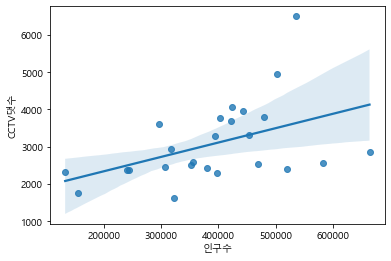

In [14]:
# CCTV 댓수 vs. 인구수, 외국인 비율, 고령자비율
sns.regplot(x='인구수', y='CCTV댓수', data=df)
plt.show()

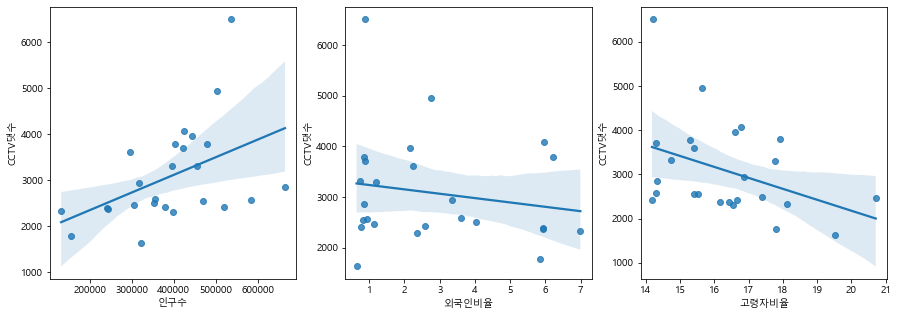

In [15]:
# subplot(반복문 쓰기 힘듦) 
# subplots

fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(15,5))
features = ['인구수', '외국인비율', '고령자비율']
for i, feature in enumerate(features):
    sns.regplot(x=feature, y='CCTV댓수', data=df, ax=axs[i])



In [16]:
for i, feature in enumerate(features):
    print(i, feature)

0 인구수
1 외국인비율
2 고령자비율


- 구별 CCTV 댓수

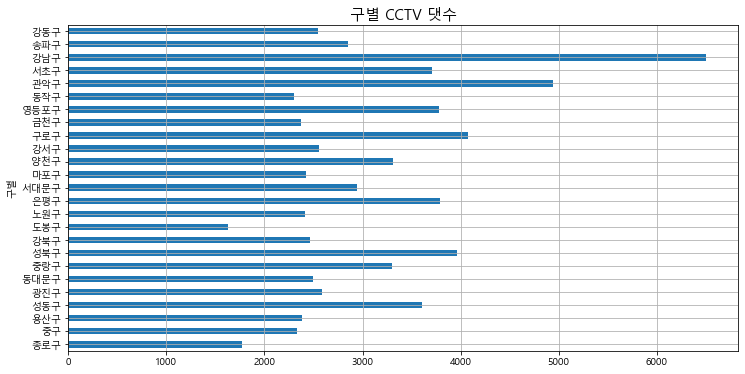

In [19]:
df.CCTV댓수.plot(kind='barh', grid=True, figsize=(12,6))
plt.title('구별 CCTV 댓수', fontsize=15)
plt.show()


- 인구 천명 당 CCTV 비율

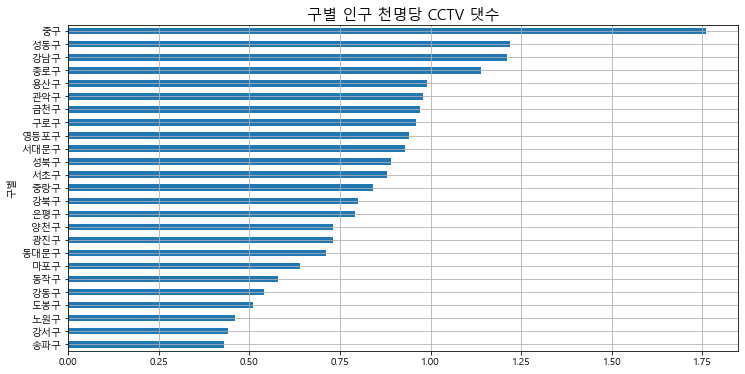

In [20]:
df['천명당CCTV'] = (df.CCTV댓수 / df.인구수 * 100).round(2)
df.천명당CCTV.sort_values().plot(kind='barh', grid=True, figsize=(12,6))
plt.title('구별 인구 천명당 CCTV 댓수', fontsize=15)
plt.show()

- 인구수와 CCTV 댓수의 관계

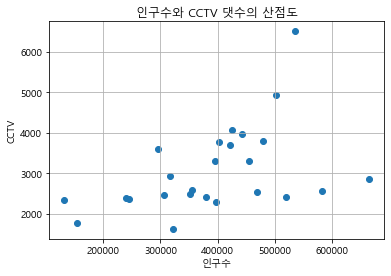

In [21]:
# 산점도(Scatter plot)
plt.scatter(x=df.인구수, y=df.CCTV댓수)
plt.grid()
plt.title('인구수와 CCTV 댓수의 산점도')
plt.xlabel('인구수')
plt.ylabel('CCTV')
plt.show()

- 회귀선

In [26]:
# 1 - 1차선
# 앞쪽 출력값이 기울기
weight, bias = np.polyfit(df.인구수, df.CCTV댓수, 1)
weight, bias

(0.0038511976508863724, 1572.3151359747483)

In [28]:
xs = np.array([100000, 700000])
ys = weight * xs + bias
ys

array([1957.43490106, 4268.1534916 ])

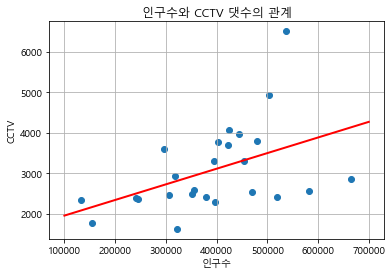

In [29]:
plt.scatter(x=df.인구수, y=df.CCTV댓수)
plt.plot(xs, ys, 'r-', lw=3)
# plt.plot(xs, ys, 'g--', lw=2) 점선
plt.grid()
plt.title('인구수와 CCTV 댓수의 관계')
plt.xlabel('인구수')
plt.ylabel('CCTV')
plt.show()

- 회귀선과 산점도 사이의 오차

In [31]:
df['오차'] = abs(df.CCTV댓수 - (df.인구수*weight + bias)).round(2)
df_sort = df.sort_values(by='오차', ascending=False)
df_sort.head(10)

,CCTV댓수,최근증가율,인구수,외국인,고령자,외국인비율,고령자비율,천명당CCTV,오차
구별,,,,,,,,,
강남구,6502,30.99,536107,4732,76184,0.88,14.21,1.21,2865.03
관악구,4942,37.44,502698,13898,78647,2.76,15.64,0.98,1433.70
송파구,2854,164.20,664341,5671,95164,0.85,14.32,0.43,1276.82
강서구,2560,52.50,582995,5476,90404,0.94,15.51,0.44,1257.54
도봉구,1629,137.29,322419,2054,62894,0.64,19.51,0.51,1185.01
노원구,2415,38.30,520005,4008,86697,0.77,16.67,0.46,1159.96
성동구,3602,26.02,295767,6605,45591,2.23,15.41,1.22,890.63
구로구,4075,29.24,424582,25316,71186,5.96,16.77,0.96,867.54
강동구,2547,40.41,469094,3885,72275,0.83,15.41,0.54,831.89


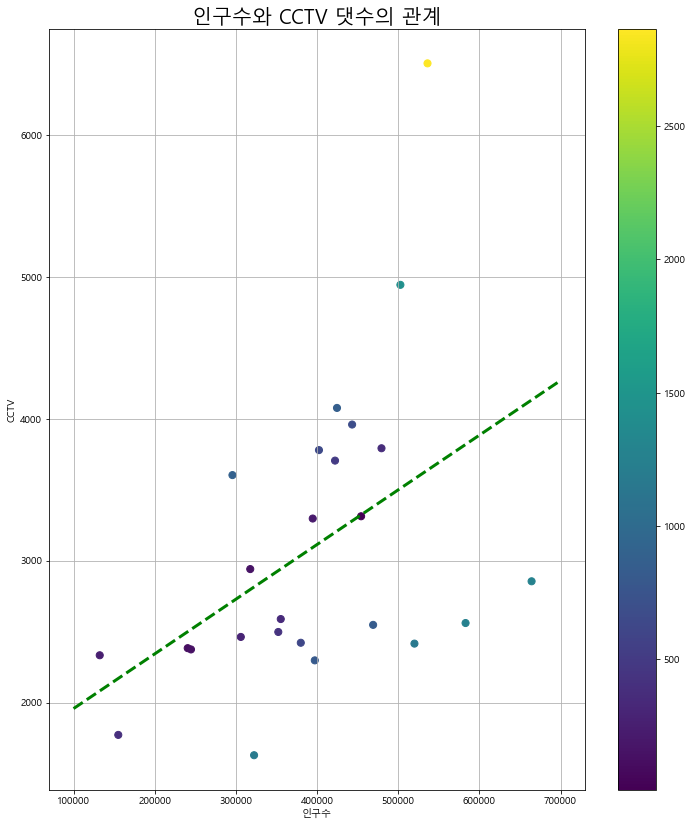

In [35]:
plt.figure(figsize=(12,14))
plt.scatter(x=df.인구수, y=df.CCTV댓수, c=df.오차,s=50)
plt.plot(xs, ys, 'g--', lw=3)
plt.grid()
plt.title('인구수와 CCTV 댓수의 관계', fontsize=20)
plt.xlabel('인구수')
plt.ylabel('CCTV')
plt.colorbar()
plt.show()

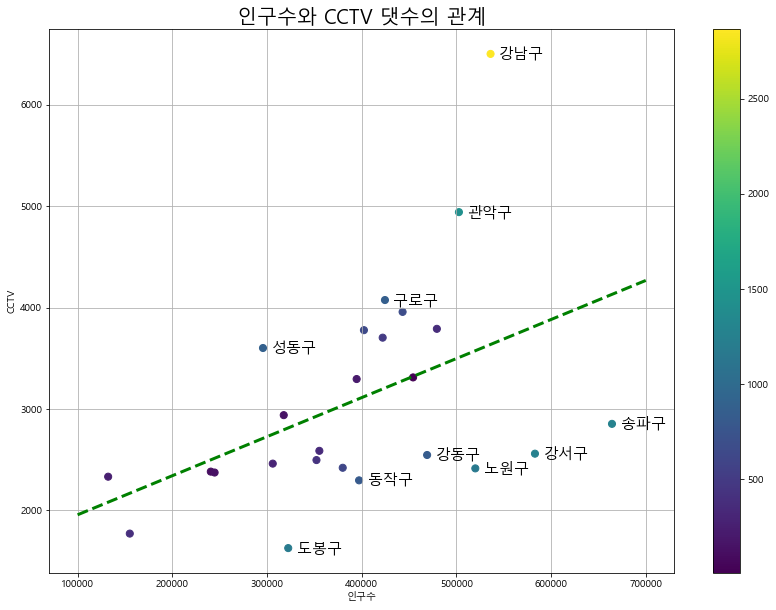

In [37]:
plt.figure(figsize=(14,10))
plt.scatter(x=df.인구수, y=df.CCTV댓수, c=df.오차,s=50)
plt.plot(xs, ys, 'g--', lw=3)
for i in range(10):
    plt.text(df_sort.인구수[i]+9000, df_sort.CCTV댓수[i]-50,
             df_sort.index[i], fontsize=15)
plt.grid()
plt.title('인구수와 CCTV 댓수의 관계', fontsize=20)
plt.xlabel('인구수')
plt.ylabel('CCTV')
plt.colorbar()
plt.savefig('서울시_인구수와_CCTV댓수의_관계.png')